<a href="https://colab.research.google.com/github/tirals88/Deep-Learning-from-Scratch/blob/main/1%EA%B6%8C_4%EC%9E%A5(3)_%ED%95%99%EC%8A%B5_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#드라이브연동
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
cd '/content/drive/My Drive/DLscratch/deep-learning-from-scratch/ch04'

/content/drive/My Drive/DLscratch/deep-learning-from-scratch/ch04


# 학습 알고리즘 구현하기

---

- 전체적인 절차 !

신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습 ( training )'이라고 한다. 다음과 같은 4단계로 수행한다.

- 1단계 - 미니배치

훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.

In [ ]:
# 미니배치

batch_mask = np.random.choice(60000, 10)
print(batch_mask)

[ 1116 21063 23281 40060 23019 42387 38044 30782 16284 40066]


In [ ]:
# np.argamx() 이해

x = np.array([[.1, .7, .2], [.3, .1, .6],[.2, .5, .3],[.8, .1, .1]])
y= np.argmax(x)
print(y) # x.reshape(1, x.size) 한 이후 나온 index 와 같음

x2 = np.array([[1, 2, 3], [9, 8, 7], [10, 12, 11], [5, 6, 7]])
y2 = np.argmax(x2,axis = 0)
y3 = np.argmax(x2,axis = 1)

print(y2, y3)

# axis = 0 , 1 -> y, x 축 순 ( 0차원 , 1차원 순 임)

9
[2 2 2] [2 0 1 2]


- 2단계 - 기울기 산출

미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게하는 방향을 제시한다.

- 3단계 - 매개변수 갱신

가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

- 4단계  - 반복

1~3단계를 반복한다.

위 과정은 경사 하강법으로 매개변수를 갱신하는 방법이며, 이 때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 부른다. - SGD

In [16]:
# 손글씨 숫자 학습 신경망 구현
# 2층 신경망을 하나의 클래스로 구현한다. ( TwoLayerNet / ch04/two_layer_net.py )

import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size,
               weight_init_std = 0.01):
    
    # 가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * \
                        np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * \
                        np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis = 1)
    t = np.argmax(t, axis = 1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  # x : 입력 데이터, t : 정답 레이블 
  def numerical_gradient(self, x, t):
    loss_W = lambda W : self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [ ]:
net = TwoLayerNet(input_size = 784, hidden_size = 100, output_size = 10) # 이미지 데이터가 28*28 이미지 데이터로 입력 N * 784 의 사이즈로 입력 됨 / 출력층은 0~9 까지의 숫자
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


TwoLayerNet 클래스 내 변수

- params : { 매개변수 $W$ 가중치와 $b$ 편향을 저장하는 딕셔너리 }
- grads : { numerical_gradient / $\frac{\partial L}{\partial W}$ 가중치의 기울기와 $\frac{\partial L}{\partial b}$ 편향의 기울기를 저장하는 딕셔너리다 }

TwoLayerNet 클래스 내 메서드

- __init__(self, input_size, hidden_size, output_size) : 초기화 수행 (인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수)

- predict(self, x) : 예측 수행 / x 는 이미지 데이터
- loss(self, x, t) : 손실 함수의 값을 구한다. / x 는 이미지 데이터, t 는 정답 레이블
- accuracy(self, x, t) : 정확도 계산
- numerical_gradient(self, x, t) : 가중치 매개변수 기울기 계산

In [ ]:
# 실제 예측 처리 방식

x = np.random.randn(100, 784) # 더미 입력 데이터 (100장 이미지 데이터)
t = np.random.randn(100, 10)  # 더미 정답 레이블 (100장 이미지 정답)

grads = net.numerical_gradient(x, t)

In [ ]:
# 미니배치 학습 구현하기

import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet    불러와야하지만 이 코드 내에서 이미 생성했기 때문에 그대로 사용

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []

#하이퍼파라미터
iters_num = 30 # 반복횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
  # 미니 배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) #성능 개선판!

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

Text(0, 0.5, 'loss')

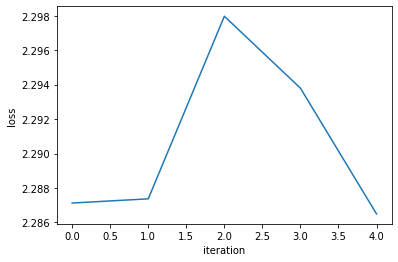

In [ ]:
# iters_num = 5
import matplotlib.pyplot as plt

axis_y1 = train_loss_list
axis_x = np.arange(5)
plt.plot(axis_x, axis_y1)
plt.xlabel('iteration')
plt.ylabel('loss')

In [ ]:
print(train_loss_list)

[2.2871252203764185, 2.287369612913516, 2.2979695085382867, 2.293793384783059, 2.2864934309317295]


Text(0, 0.5, 'loss')

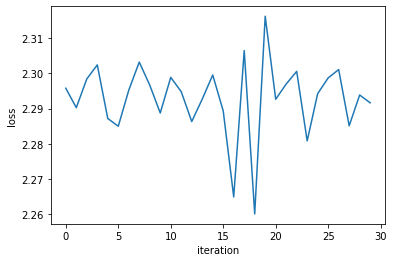

In [ ]:
# iters_num = 30
axis_y2 = train_loss_list
axis_x = np.arange(30)
plt.plot(axis_x, axis_y2)
plt.xlabel('iteration')
plt.ylabel('loss')

# 시험 데이터로 평가하기
---

학습을 반복함으로써 손실 함수의 값이 서서히 내려가는 것을 확인 할 수 있다.

이때의 손실함수의 값은 정확히는 '**훈련 데이터의 미니배치에 대한 손실 함수**'의 값이다.

훈련 데이터의 손실 함수 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않다.

👉 그래서 훈련 데이터 외의 데이터를 올바르게 인식하는지를 환인해야한다.

👉 다른 말로 '오버피팅'을 일으키지 않는지 확인해야 한다.

**오버피팅**이 되었다는 것은, 예를 들어 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.

신경망 학습의 원래 목표는 범용적인 능력을 익히는 것이다.

범용적인 능력을 평가하기 위해 훈련 데이터에 포함되지 않은 데이터를 사용해 평가를 해봐야한다.

👉 이를 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다.

여기에서는 1에폭별로 훈련 데이터와 시험데이터에 대한 정확도를 기록한다

< epoch > : 에폭은 하나의 단위로서 1에폭은 학습에서 훈련데이터를 모두 소진했을 때의 횟수에 해당한다. 확률적 경사 하강법을 100회 하였다면 100회가 1 에폭이 된다.



In [20]:
# 위 구현에서 평가를 추가함

import numpy as np
from dataset.mnist import load_mnist
#from two_layer_net import TwoLayerNet    불러와야하지만 이 코드 내에서 이미 생성했기 때문에 그대로 사용

(x_train, t_train), (x_test, t_test) = \
  load_mnist(normalize = True, one_hot_label = True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

#하이퍼파라미터
iters_num = 60 # 반복횟수
train_size = x_train.shape[0]
batch_size = 60 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

# 1 에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  # 미니 배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)
  # grad = network.gradient(x_batch, t_batch) #성능 개선판!

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

# 1에폭 당 정확도 계산
# if i % iter_per_epoch == 0 : ( 예제에서는 iters_num = 10000 이기 때문에 iter_per_epoch 을 60으로 뒀지만 이 평가에서는 1로 두겠다)

  if i % 1 == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc : "
        + str(train_acc) + ", " + str(test_acc))

train acc, test acc : 0.09035, 0.0892
train acc, test acc : 0.09288333333333333, 0.0929
train acc, test acc : 0.09863333333333334, 0.0958
train acc, test acc : 0.10218333333333333, 0.101
train acc, test acc : 0.09863333333333334, 0.0958
train acc, test acc : 0.09861666666666667, 0.0958
train acc, test acc : 0.11236666666666667, 0.1135
train acc, test acc : 0.11236666666666667, 0.1135
train acc, test acc : 0.11236666666666667, 0.1135
train acc, test acc : 0.16878333333333334, 0.1622
train acc, test acc : 0.09863333333333334, 0.0958
train acc, test acc : 0.09863333333333334, 0.0958
train acc, test acc : 0.09863333333333334, 0.0958
train acc, test acc : 0.09035, 0.0892
train acc, test acc : 0.10441666666666667, 0.1028
train acc, test acc : 0.10441666666666667, 0.1028
train acc, test acc : 0.11171666666666667, 0.1089
train acc, test acc : 0.10441666666666667, 0.1028
train acc, test acc : 0.10441666666666667, 0.1028
train acc, test acc : 0.11236666666666667, 0.1135
train acc, test acc : 0.0

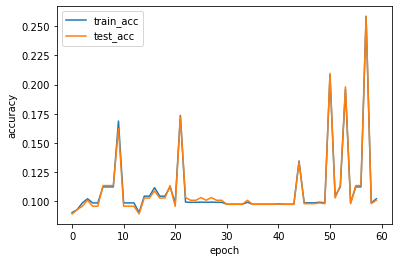

In [27]:
# batch_size = 60, iters_num = 60
axis_y2 = train_acc_list
axis_y3 = test_acc_list
axis_x = np.arange(60)
plt.plot(axis_x, axis_y2, label = 'train_acc')
plt.plot(axis_x, axis_y3, label = 'test_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

학습 정체기 발생으로 초기화 후 재진행

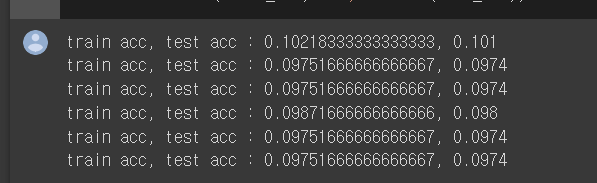

거의 학습은 하나도 안된 것 같고 우연히 상승한 정확도 같지만 일단 완성!

numpy 너무 느리다...